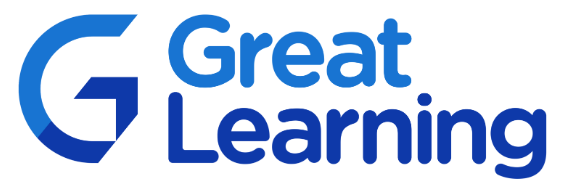

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Course 2: Week05 - Linear Regression - Practice Exercise

-------------

##  <font color='blue'> Table Of Contents </font>
- ### <font color='blue'> Problem Statement </font>   
- ### <font color='blue'> Importing necessary libraries and reading the dataset </font>
- ### <font color='blue'> Exploratory Data Analysis</font>
- ### <font color='blue'> Data Preparation for Model Building</font>
- ### <font color='blue'> Model Building and Evaluation</font>

### <font color = 'green'> **Problem-Statement**



<p>Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.</p>
<p>We have a data of 74111 Airbnb properties across the nations. Based on this data build multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.</p>


#### <font color = 'green'> **Attribute Information.**

- **id** - Property ID
- **room_type** - Type of Room in the property.
- **accommodates** - How many adults can this property accomodates.
- **bathrooms** - Number of bathrooms in the property.
- **cancellation_policy** - Cancellation policy of the property.
- **cleaning_fee** - This denotes whether propoerty cleaning fee is included in the rent or not.
- **instant_bookable** - It indicates whether instant booking facility is available or not.
- **review_scores_rating** - Review rating score of the property.
- **bedrooms** - Number of bedrooms in the property.
- **beds** - Total number of beds in the property.
- **log_price** - Log of rental price of the property for a fixed period.


### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [263]:
# Numerical libraries
import math
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [264]:

df = pd.read_csv("AirBNB-1.csv")
df.head()

C:\Users\prane\AppData\Local\Temp\ipykernel_28960\1535547559.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB-1.csv")


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [266]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [267]:
df.describe(include=object)

,room_type,cancellation_policy,cleaning_fee,instant_bookable
count,74106,74103,74107,74111
unique,3,3,2,2
top,Entire home/apt,strict,True,f
freq,41308,32500,54399,54660


In [268]:
df.dtypes

id                        int64
room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee             object
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object


### <font color = 'green'> **Exploratory Data Analysis**


<font size=3> Perform Necessary Exploratory Data Analysis.

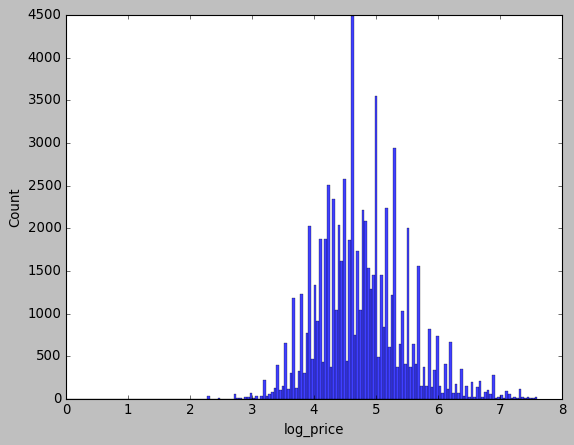

In [269]:
sns.histplot(data=df, x="log_price")
plt.show()

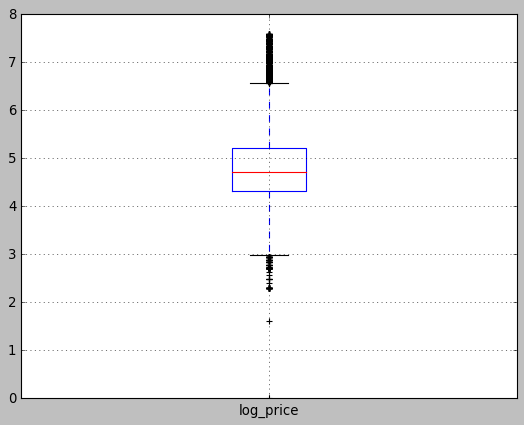

In [270]:
df.boxplot(["log_price"])
plt.show()

In [271]:
df.dtypes

id                        int64
room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee             object
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Encode Categorical Variables.

In [272]:
df=pd.get_dummies(df,drop_first=True,dtype=int)

In [273]:
df.head()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,13418779,4.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,1,0
4,3808709,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1


<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [274]:
df.isnull().sum()*100/len(df)

id                               0.000000
accommodates                     0.004048
bathrooms                        0.273913
review_scores_rating            22.563452
bedrooms                         0.124138
beds                             0.176762
log_price                        0.000000
room_type_Private room           0.000000
room_type_Shared room            0.000000
cancellation_policy_moderate     0.000000
cancellation_policy_strict       0.000000
cleaning_fee_True                0.000000
instant_bookable_t               0.000000
dtype: float64

In [275]:
df.drop('id',axis=1)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1.0,1.0,NaN,1.0,1.0,4.605170,1,0,0,0,0,0
74107,4.0,2.0,93.0,2.0,4.0,5.043425,0,0,1,0,1,0
74108,5.0,1.0,94.0,2.0,2.0,5.220356,0,0,1,0,1,1
74109,2.0,1.0,NaN,0.0,2.0,5.273000,0,0,0,1,1,1


In [276]:
for col in ['accommodates','bathrooms','review_scores_rating','bedrooms','beds']:
    df[col]=df[col].fillna(df[col].median())


In [277]:
df.drop_duplicates(inplace=True)

<Axes: >

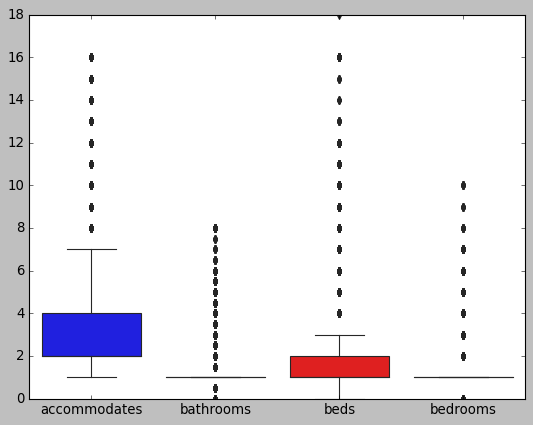

In [278]:
sns.boxplot(df[['accommodates','bathrooms','beds','bedrooms']])

<Axes: >

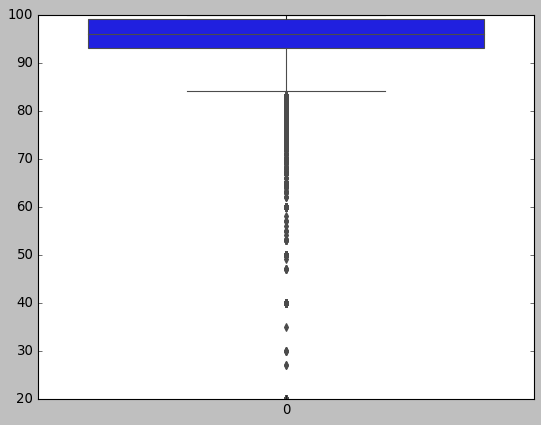

In [279]:
sns.boxplot(df['review_scores_rating'])

<font size=3> Q. Check for duplicate records and drop them.

In [280]:
for col in ['accommodates','bathrooms','review_scores_rating','bedrooms','beds']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3-1.5*iqr
    ser=df[col].copy()
    ser[ser<lower_whisker]=lower_whisker
    ser[ser<upper_whisker]=upper_whisker
    df[col]=ser

In [281]:
df.head()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,6901257,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,6304928,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,7919400,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,13418779,4.0,1.0,96.0,2.0,2.0,6.620073,0,0,0,0,1,0
4,3808709,2.0,1.0,90.0,1.0,1.0,4.744932,0,0,1,0,1,1


<font size=3> Q. Check for the presence of outliers and treat them with appropriate techniques.

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [282]:
X=df.drop('log_price',axis=1)
y=df[['log_price']]

In [283]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

<font size=3> Q. Scale the data using appropriate approach.

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
ss=StandardScaler()

In [286]:
X_train=ss.fit_transform(X_train)

In [287]:
X_test=ss.fit_transform(X_test)

### <font color = 'green'> **Model buidling - Linear Regression Model**

<font size=3> Q. Buid a linear regression model and evaluate the model performance.

In [288]:
lr=LinearRegression()

In [289]:
lr.fit(X_train,y_train)

LinearRegression()

In [290]:
#check performance of training data

lr.score(X_train,y_train)

0.5177401466699008

In [291]:
#check performance of test data

lr.score(X_test,y_test)

0.5220044553051029

# OLS Method

In [292]:
data_train=pd.concat([pd.DataFrame(X_train,columns=X.columns),y_train],axis=1)
data_train.head()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t,log_price
0,0.291661,0.392540,-0.412103,-1.079765,0.844120,0.233723,-0.839522,-0.171069,-0.590076,-0.881772,0.603056,1.671313,5.010635
1,-1.703200,1.320319,1.309693,0.682654,0.844120,1.031858,-0.839522,-0.171069,-0.590076,1.134079,0.603056,1.671313,5.129899
2,0.735262,-0.535238,-0.412103,-1.667239,-0.465872,-0.564411,1.191153,-0.171069,1.694696,-0.881772,-1.658220,-0.598332,4.976734
3,-1.411560,0.856429,-0.412103,-1.373502,0.844120,2.628128,-0.839522,-0.171069,-0.590076,1.134079,0.603056,1.671313,6.620073
4,1.144788,-0.535238,-0.412103,0.095181,-0.465872,-0.564411,1.191153,-0.171069,-0.590076,-0.881772,0.603056,1.671313,4.744932


In [ ]:
lm1=smf.ols(formula='log_price ~accommodates+room_type+cancellation_policy+cleaning_fee',data=data_train).fit()
print(lm1.params)

In [297]:
vf=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]

In [300]:
i=0
for column in x.columns:
    if i <11:
        print(column,"--->",vf[i])
        i=i+1

id ---> 4.4135901318492365
accommodates ---> 12.189035436716717
bathrooms ---> 9.497239247917765
review_scores_rating ---> 16.107397861848796
bedrooms ---> 13.362058540323785
beds ---> 9.893022332623026
room_type_Private room ---> 2.337124822900701
room_type_Shared room ---> 1.1416090180590337
cancellation_policy_moderate ---> 1.9909949755724436
cancellation_policy_strict ---> 2.8390976609253555
cleaning_fee_True ---> 4.447393456857459


<font size=3> Please do play around with the data and check whether the accuracy can be increased or not. Also, do try to interpret the output and write your conclusions.

-----
### Happy Learning :)
-----